In [2]:
import pandas as pd

## 예제 5-6 피봇을 이용한 재구조화 
### 피봇: 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 방식

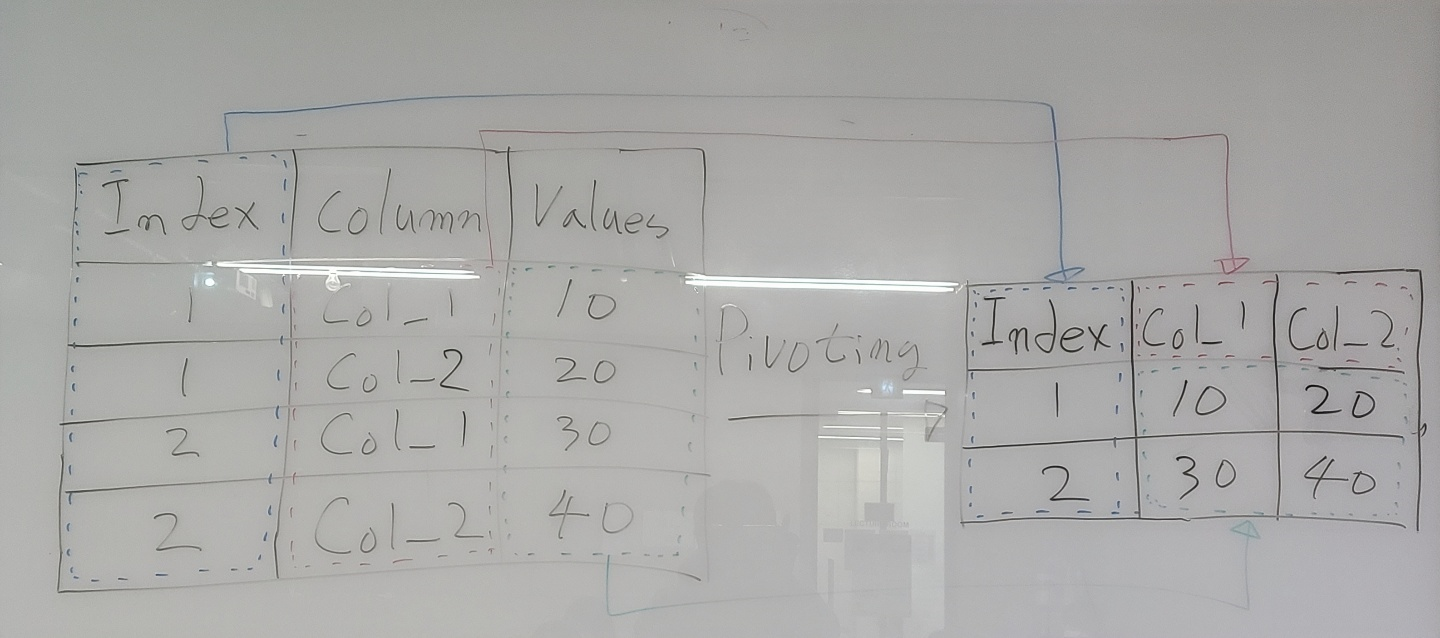

In [3]:
df10 = pd.DataFrame([
    ['index_1','col_1','10'],
    ['index_2','col_1','20'],
    ['index_1','col_2','30'],
    ['index_2','col_2','40']
], columns = ['index','cols','value'])

In [4]:
df10

,index,cols,value
0,index_1,col_1,10
1,index_2,col_1,20
2,index_1,col_2,30
3,index_2,col_2,40


In [5]:
df10_pivoted = df10.pivot(index='index',columns = 'cols', values = 'value')

In [6]:
df10_pivoted

cols,col_1,col_2
index,,
index_1,10,30
index_2,20,40


In [7]:
df = pd.DataFrame([
        ['20180901', 'A',   10],
        ['20180901', 'B',  100],
        ['20180901', 'C', 1000],
        ['20180902', 'A',   20],
        ['20180902', 'B',  200],
        ['20180902', 'C', 2000],
        ['20180903', 'A',   30],
        ['20180903', 'B',  300],
        ['20180903', 'C', 3000],
], columns=['date', 'typecode', 'volume'])

In [8]:
df

,date,typecode,volume
0,20180901,A,10
1,20180901,B,100
2,20180901,C,1000
3,20180902,A,20
4,20180902,B,200
5,20180902,C,2000
6,20180903,A,30
7,20180903,B,300
8,20180903,C,3000


In [9]:
# 분석하고자하는 값은 volume이며 분석기준은 data,typecode
# 해석 : 날짜별 typecode별 volume
df_pivoted = df.pivot(index='date', columns='typecode', values='volume' )

In [10]:
df_pivoted

typecode,A,B,C
date,,,
20180901,10,100,1000
20180902,20,200,2000
20180903,30,300,3000


In [11]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [12]:
# 피벗 분석을 분석을 할 때 대상이 되는 열의 데이터 유형은 범주형 데이터를 선택한다.
# 2개의 열중에 데이터의 값이 많은 범주형 데이터를 일반적으로 행의 인덱스로 선택한다.
# 데이터프레임명.pivot(행기준,열기준,값기준)
df1.pivot("도시", "연도", "인구")
# 연도가 2005, 2010, 2015년으로 전개 되는데 해당값이 없다면 NaN으로 표시한다.
# 예) 2005년 인천의 값

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [13]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천","부산"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010","2015"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 2632003,1000000],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권","경상권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632003,수도권
8,부산,2015,1000000,경상권


In [14]:
# 중복이 되는 행의 값이 있을 경우 pivot이 불가능
# df1.pivot("도시", "연도", "인구")

In [15]:
# 이럴 경우 pivot_table에서 aggfunc로 통계지표를 얻을 수 있음
df2=df1.pivot_table(values='인구', index='도시', columns='연도', aggfunc='sum')
df2

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,4448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,2632003.0,2890451.0


### groupby: 데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도로 데이터를 처리
#### 그룹별 통계량을 확인할 때 확인하는 함수

#### 동작원리

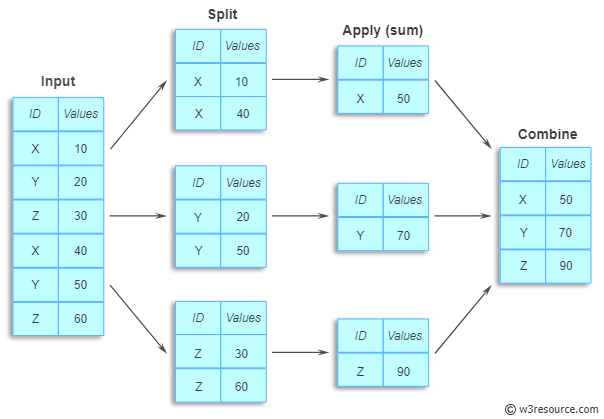

In [16]:
import seaborn as sns
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
# sex를 기준으로 수치형 데이터에 대한 통계자료를 제공
df.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [18]:
# groupby 자체로는 의미가 없음
df.groupby('sex')

In [19]:
# smoker,day,time,size기준으로도 그룹화할 수 있을 듯

In [20]:
df.groupby('smoker').mean()

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


In [21]:
df_time = df.groupby('time').mean()

In [22]:
df_time

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


In [23]:
df_time['total_bill'][1]

20.79715909090909

In [24]:
df.groupby('size').mean()

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


In [25]:
import seaborn as sns

In [26]:
titanic = sns.load_dataset('titanic')

In [27]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [29]:
# 모든 수치형 열에 대한 평균값을 집계
titaic_s =  titanic.groupby('survived').mean()

In [30]:
titaic_s

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.817851,0.681239
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.257310,0.476608


In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
# sex열의 값을 행인덱스 기준, class열의 값을 열인덱스로 지정하여
# survived 값에 대한 집계방식을 sum으로 지정함
titanic_ = titanic.pivot_table(values='survived',
                               index='sex', 
                               columns='class',
                               aggfunc='sum')
# 성별을 행기준으로 클래스를 열기준으로 생존여부를 값으로 동일한 행열 값은 합계로

In [33]:
titanic_

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [34]:
titanic_.sum().sum()

342

In [35]:
titanic['survived'].sum()

342

## Stack/Unstack
### Stack: 열을 행인덱스로 전환, Unstack: 행을 열인덱스로 전환 

In [36]:
weight = pd.read_csv('../data/weight_loss.csv',encoding='cp949')

In [37]:
weight.head()

,이름,월,주,몸무게
0,지완,1월,1주,70
1,찬준,1월,1주,60
2,지완,1월,2주,69
3,찬준,1월,2주,59
4,지완,1월,3주,69


In [38]:
# 주 열의 값 중 '4주'인 값만 필터링
week4 = weight.query('주 == "4주"')
# 데이터프레임명.query(조건)

In [39]:
week4

,이름,월,주,몸무게
6,지완,1월,4주,69
7,찬준,1월,4주,59
14,지완,2월,4주,66
15,찬준,2월,4주,56
22,지완,3월,4주,64
23,찬준,3월,4주,54
30,지완,4월,4주,62
31,찬준,4월,4주,52


In [40]:
week4.pivot(index='월', columns='이름', values="몸무게")

이름,지완,찬준
월,,
1월,69,59
2월,66,56
3월,64,54
4월,62,52


In [41]:
week4.pivot_table(index='월',columns='이름',values="몸무게")

이름,지완,찬준
월,,
1월,69,59
2월,66,56
3월,64,54
4월,62,52


## 예제 5-7 스택을 이용한 재구조화

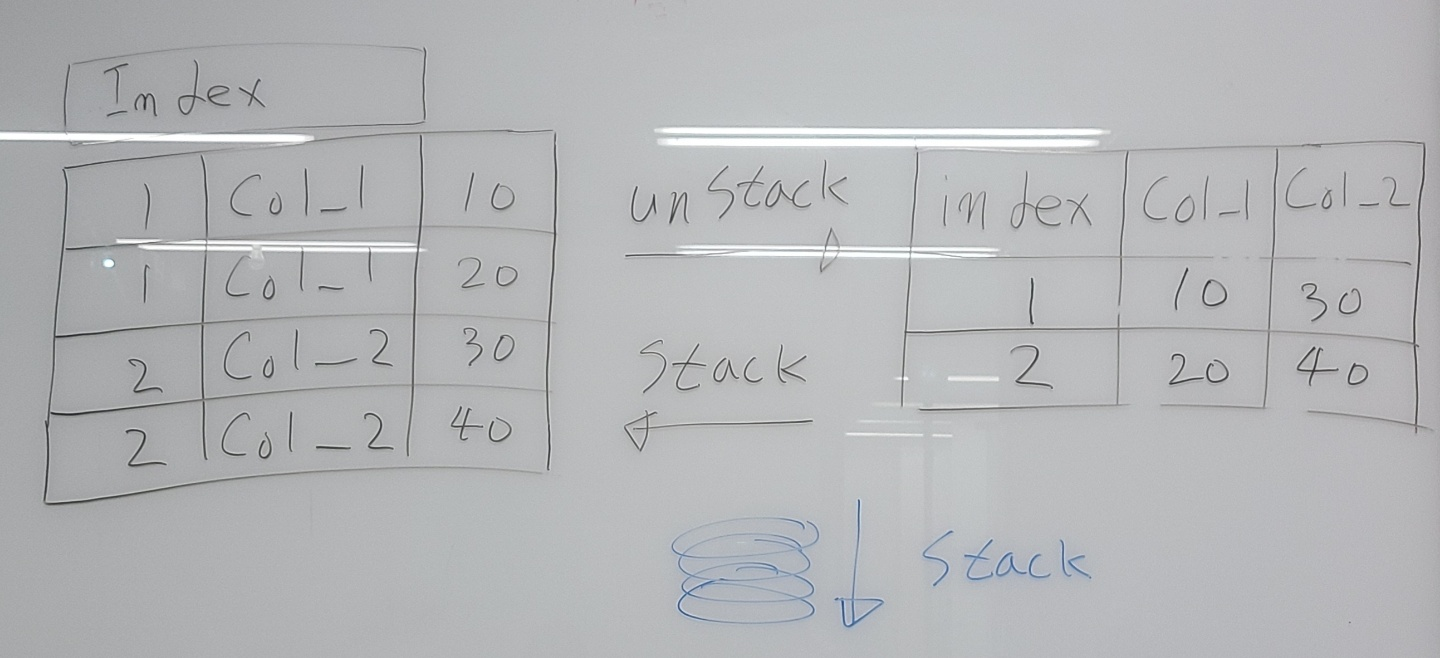

In [42]:
week4

,이름,월,주,몸무게
6,지완,1월,4주,69
7,찬준,1월,4주,59
14,지완,2월,4주,66
15,찬준,2월,4주,56
22,지완,3월,4주,64
23,찬준,3월,4주,54
30,지완,4월,4주,62
31,찬준,4월,4주,52


In [43]:
week5 = week4.set_index(['이름','월'])

In [44]:
week5.head()

,,주,몸무게
이름,월,,
지완,1월,4주,69
찬준,1월,4주,59
지완,2월,4주,66
찬준,2월,4주,56
지완,3월,4주,64


In [45]:
# 주, 몸무게가 행의 멀티인덱스로 들어가게 된다.
week5_st = week5.stack()

In [46]:
type(week5_st)

pandas.core.series.Series

In [47]:
week5_st

이름  월      
지완  1월  주      4주
        몸무게    69
찬준  1월  주      4주
        몸무게    59
지완  2월  주      4주
        몸무게    66
찬준  2월  주      4주
        몸무게    56
지완  3월  주      4주
        몸무게    64
찬준  3월  주      4주
        몸무게    54
지완  4월  주      4주
        몸무게    62
찬준  4월  주      4주
        몸무게    52
dtype: object

In [48]:
week5_st.index.get_level_values(0)

Index(['지완', '지완', '찬준', '찬준', '지완', '지완', '찬준', '찬준', '지완', '지완', '찬준', '찬준',
       '지완', '지완', '찬준', '찬준'],
      dtype='object', name='이름')

In [49]:
week5_st.index.get_level_values(1)

Index(['1월', '1월', '1월', '1월', '2월', '2월', '2월', '2월', '3월', '3월', '3월', '3월',
       '4월', '4월', '4월', '4월'],
      dtype='object', name='월')

In [50]:
week5_st.index.get_level_values(2)

Index(['주', '몸무게', '주', '몸무게', '주', '몸무게', '주', '몸무게', '주', '몸무게', '주', '몸무게',
       '주', '몸무게', '주', '몸무게'],
      dtype='object')

In [51]:
week5_st.values

array(['4주', 69, '4주', 59, '4주', 66, '4주', 56, '4주', 64, '4주', 54, '4주',
       62, '4주', 52], dtype=object)

In [52]:
week5

,,주,몸무게
이름,월,,
지완,1월,4주,69
찬준,1월,4주,59
지완,2월,4주,66
찬준,2월,4주,56
지완,3월,4주,64
찬준,3월,4주,54
지완,4월,4주,62
찬준,4월,4주,52


In [53]:
week5_st.head(3)

이름  월      
지완  1월  주      4주
        몸무게    69
찬준  1월  주      4주
dtype: object

In [54]:
to_week5 = week5_st.to_frame()

In [55]:
to_week5.head()

0
이름 월         
지완 1월 주    4주
      몸무게  69
찬준 1월 주    4주
      몸무게  59
지완 2월 주    4주

In [56]:
to_week5.index.levels

FrozenList([['지완', '찬준'], ['1월', '2월', '3월', '4월'], ['주', '몸무게']])

In [57]:
to_week5.columns

RangeIndex(start=0, stop=1, step=1)

In [58]:
week5

,,주,몸무게
이름,월,,
지완,1월,4주,69
찬준,1월,4주,59
지완,2월,4주,66
찬준,2월,4주,56
지완,3월,4주,64
찬준,3월,4주,54
지완,4월,4주,62
찬준,4월,4주,52


In [59]:
# 행의 하위 인덱스가 열의 하위 인덱스로 전환됨
week5_un = week5.unstack()

In [60]:
type(week5_un)

pandas.core.frame.DataFrame

In [61]:
week5_un.head()

주             몸무게            
월   1월  2월  3월  4월  1월  2월  3월  4월
이름                                
지완  4주  4주  4주  4주  69  66  64  62
찬준  4주  4주  4주  4주  59  56  54  52

In [62]:
# unstack() 메소드를 메소드체인으로 모든 행 인덱스를 소진하도록 연결하면
# 데이터프레임의 형태가 아닌 시리즈로 반환하게 되는 점에 유의한다.
week5_un_un = week5.unstack().unstack()

In [63]:
type(week5_un_un)

pandas.core.series.Series

In [64]:
week5_un_un.values

array(['4주', '4주', '4주', '4주', '4주', '4주', '4주', '4주', 69, 59, 66, 56, 64,
       54, 62, 52], dtype=object)

In [65]:
week5_un_un

     월   이름
주    1월  지완    4주
         찬준    4주
     2월  지완    4주
         찬준    4주
     3월  지완    4주
         찬준    4주
     4월  지완    4주
         찬준    4주
몸무게  1월  지완    69
         찬준    59
     2월  지완    66
         찬준    56
     3월  지완    64
         찬준    54
     4월  지완    62
         찬준    52
dtype: object

In [66]:
week5_un_un.unstack()

이름      지완  찬준
    월         
주   1월  4주  4주
    2월  4주  4주
    3월  4주  4주
    4월  4주  4주
몸무게 1월  69  59
    2월  66  56
    3월  64  54
    4월  62  52

In [67]:
week6_un = week5_un_un.unstack(0)
week6_un

주 몸무게
월  이름        
1월 지완  4주  69
   찬준  4주  59
2월 지완  4주  66
   찬준  4주  56
3월 지완  4주  64
   찬준  4주  54
4월 지완  4주  62
   찬준  4주  52

In [68]:
week7 = week6_un['몸무게']

In [69]:
week7.to_frame()

몸무게
월  이름    
1월 지완  69
   찬준  59
2월 지완  66
   찬준  56
3월 지완  64
   찬준  54
4월 지완  62
   찬준  52

In [70]:
week7 = week7.unstack(0)

In [71]:
week7

월,1월,2월,3월,4월
이름,,,,
지완,69,66,64,62
찬준,59,56,54,52


In [72]:
week5_un_un.unstack().unstack()

이름   지완              찬준            
월    1월  2월  3월  4월  1월  2월  3월  4월
주    4주  4주  4주  4주  4주  4주  4주  4주
몸무게  69  66  64  62  59  56  54  52

In [73]:
week5_un_un.to_frame()

0
    월  이름    
주   1월 지완  4주
       찬준  4주
    2월 지완  4주
       찬준  4주
    3월 지완  4주
       찬준  4주
    4월 지완  4주
       찬준  4주
몸무게 1월 지완  69
       찬준  59
    2월 지완  66
       찬준  56
    3월 지완  64
       찬준  54
    4월 지완  62
       찬준  52

In [74]:
week4

,이름,월,주,몸무게
6,지완,1월,4주,69
7,찬준,1월,4주,59
14,지완,2월,4주,66
15,찬준,2월,4주,56
22,지완,3월,4주,64
23,찬준,3월,4주,54
30,지완,4월,4주,62
31,찬준,4월,4주,52


In [75]:
week4_s = week4['몸무게']

In [76]:
week4_s

6     69
7     59
14    66
15    56
22    64
23    54
30    62
31    52
Name: 몸무게, dtype: int64

In [77]:
week4_s.index = week5['몸무게'].index

In [78]:
week4_s

이름  월 
지완  1월    69
찬준  1월    59
지완  2월    66
찬준  2월    56
지완  3월    64
찬준  3월    54
지완  4월    62
찬준  4월    52
Name: 몸무게, dtype: int64

In [79]:
week4_s.unstack()

월,1월,2월,3월,4월
이름,,,,
지완,69,66,64,62
찬준,59,56,54,52


In [80]:
type(week4_s.unstack())

pandas.core.frame.DataFrame

## 예제 5-8  데이터를 합치기 

In [81]:
import numpy as np

In [82]:
columns = np.array(['봄','여름','가을','겨울'])

In [83]:
data = np.array([['A0','A1','A2','A3'],
                 ['B0','B1','B2','B3'],
                 ['C0','C1','C2','C3'],
                 ['D0','D1','D2','D3']])

In [84]:
data

array([['A0', 'A1', 'A2', 'A3'],
       ['B0', 'B1', 'B2', 'B3'],
       ['C0', 'C1', 'C2', 'C3'],
       ['D0', 'D1', 'D2', 'D3']], dtype='<U2')

In [85]:
# 전치행렬: 행렬의 순서를 바꿈
data.T

array([['A0', 'B0', 'C0', 'D0'],
       ['A1', 'B1', 'C1', 'D1'],
       ['A2', 'B2', 'C2', 'D2'],
       ['A3', 'B3', 'C3', 'D3']], dtype='<U2')

In [86]:
df1 = pd.DataFrame(data.T,columns=columns)

In [87]:
df1

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [88]:
data1 = np.array([['A4','A5','A6','A7'],
                 ['B4','B5','B6','B7'],
                 ['C4','C5','C6','C7'],
                 ['D4','D5','D6','D7']])

In [89]:
df2 = pd.DataFrame(data1.T,columns=columns)
df2

,봄,여름,가을,겨울
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [90]:
# pd.concat(데이터프레임명1,데이터프레임명2)
df_con = pd.concat([df1,df2])

In [91]:
df_con

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [92]:
index_r = list(range(0,8))

In [93]:
df_con.index = index_r

In [94]:
df_con

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [95]:
# ignore_index=True 옵션은 0부터 시작해서 자동으로 인덱스를 할당한다
df_con1 = pd.concat([df1,df2],ignore_index=True)

In [96]:
df_con1

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [97]:
# 열방향으로 concat이 됨, 동일한 열 이름을 같게됨
df_h = pd.concat([df1,df2],axis=1)

In [98]:
df_h

,봄,여름,가을,겨울,봄,여름,가을,겨울
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


In [99]:
# 열이름을 구분하기 위하여 별도의 열이름 생성
columns_r = ['봄', '여름', '가을', '겨울', '봄_', '여름_', '가을_', '겨울_']

In [100]:
df_h.columns = columns_r

In [101]:
df_h

,봄,여름,가을,겨울,봄_,여름_,가을_,겨울_
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


In [102]:
df_g = pd.concat([df1,df2],axis=1,ignore_index=True)

In [103]:
df_g

,0,1,2,3,4,5,6,7
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


## 예제 5-9  데이터를 추가하기 

In [104]:
df1

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [105]:
df11 = df1.copy()

In [106]:
df11.loc[4] = ['A4','B4','C4','D4']

In [107]:
df11

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4


In [108]:
# append 함수도 추가가 되지만 곧 deprecated 예정, concat 함수 사용할 것을 권고
df11_a = df11.append({'봄':'A5','여름' :'B5','가을':'C5','겨울':'D5'}, 
                     ignore_index=True)

C:\Users\Yangsh\AppData\Local\Temp\ipykernel_9896\1357162473.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11_a = df11.append({'봄':'A5','여름' :'B5','가을':'C5','겨울':'D5'},


In [109]:
df11_a

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5


In [110]:
df11

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4


In [111]:
df2

,봄,여름,가을,겨울
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [112]:
df11.append(df2)

C:\Users\Yangsh\AppData\Local\Temp\ipykernel_9896\1495440483.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11.append(df2)


,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


## 예제 5-10  데이터를 join 해서 처리하기

In [113]:
from pandas import Series, DataFrame

In [114]:
JDF1 = DataFrame([["싸이",180,75],["덕구",160,65],["또치",170,75]], columns = ["이름","키","몸무게"])
JDF1

,이름,키,몸무게
0,싸이,180,75
1,덕구,160,65
2,또치,170,75


In [115]:
JDF2 = DataFrame([["싸이","포워드","잘함"],["덕구","미드필더","못함"],["똥갈","수비수","잘함"]], columns = ["이름","포지션","실력"])
JDF2

,이름,포지션,실력
0,싸이,포워드,잘함
1,덕구,미드필더,못함
2,똥갈,수비수,잘함


### Inner Join

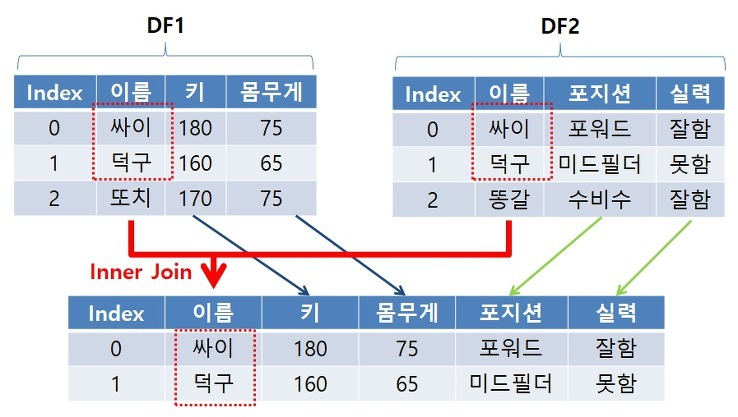

In [116]:
# pd.merge(left = 데이터프레임1, right = 데이터프레임, how = 'inner' on = '열이름')
pd.merge(left = JDF1 , right = JDF2, how = "inner", on = "이름")

,이름,키,몸무게,포지션,실력
0,싸이,180,75,포워드,잘함
1,덕구,160,65,미드필더,못함


In [117]:
JDF3 = JDF1.copy()
JDF4 = JDF2.copy()

JDF3=JDF3.set_index('이름')
JDF4=JDF4.set_index('이름')

In [118]:
JDF3

,키,몸무게
이름,,
싸이,180,75
덕구,160,65
또치,170,75


In [119]:
JDF4

,포지션,실력
이름,,
싸이,포워드,잘함
덕구,미드필더,못함
똥갈,수비수,잘함


In [120]:
JDF3.join(JDF4,how='inner')

,키,몸무게,포지션,실력
이름,,,,
싸이,180,75,포워드,잘함
덕구,160,65,미드필더,못함


### Left Outer Join

* 왼쪽 DataFrame의 모든 데이터 출력
* 오른쪽 DataFrame 중 왼쪽 DataFrame에 있는 Data는 출력
* 오른쪽 DataFrame 중 왼쪽 DataFrame에 없는 Data는 NaN으로 처리

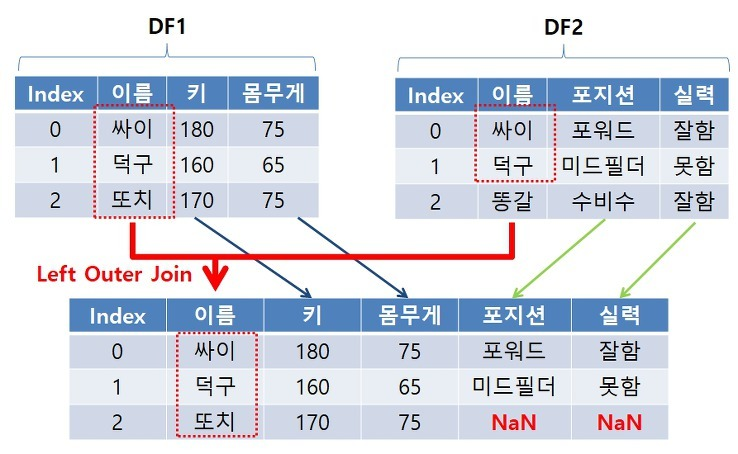

In [121]:
pd.merge(left = JDF1 , right = JDF2, how = "left", on = "이름")

,이름,키,몸무게,포지션,실력
0,싸이,180,75,포워드,잘함
1,덕구,160,65,미드필더,못함
2,또치,170,75,NaN,NaN


In [122]:
JDF3.join(JDF4, how='left')

,키,몸무게,포지션,실력
이름,,,,
싸이,180,75,포워드,잘함
덕구,160,65,미드필더,못함
또치,170,75,NaN,NaN


### Right Outer Join
* 오른쪽 DataFrame의 모든 데이터 출력 
* 왼쪽 DataFrame 중 오른쪽 DataFrame에 있는 Data는 출력
* 왼쪽 DataFrame 중 오른쪽 DataFrame에 없는 Data는 NaN으로 처리

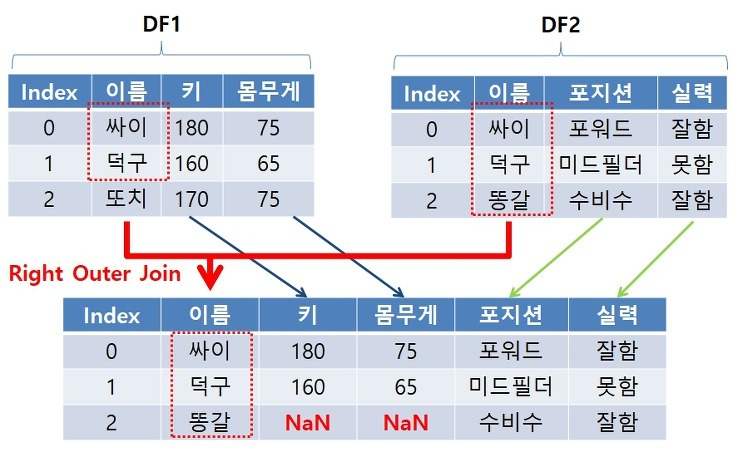

In [123]:
pd.merge(left = JDF1 , right = JDF2, how = "right", on = "이름")

,이름,키,몸무게,포지션,실력
0,싸이,180.0,75.0,포워드,잘함
1,덕구,160.0,65.0,미드필더,못함
2,똥갈,NaN,NaN,수비수,잘함


In [124]:
JDF3.join(JDF4, how='right')

,키,몸무게,포지션,실력
이름,,,,
싸이,180.0,75.0,포워드,잘함
덕구,160.0,65.0,미드필더,못함
똥갈,NaN,NaN,수비수,잘함


### Outer Join

* 왼쪽, 오른쪽 DataFrame의 모든 데이터 출력
* 왼쪽 DataFrame 중 오른쪽 DataFrame에 있는 Data는 NaN으로 처리
* 오른쪽 DataFrame 중 왼쪽 DataFrame에 없는 Data는 NaN으로 처리

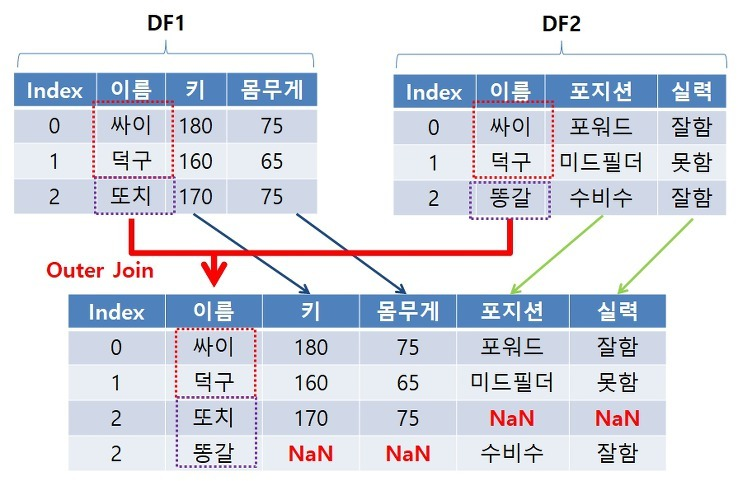

In [125]:
pd.merge(left = JDF1 , right = JDF2, how = "outer", on = "이름")

,이름,키,몸무게,포지션,실력
0,싸이,180.0,75.0,포워드,잘함
1,덕구,160.0,65.0,미드필더,못함
2,또치,170.0,75.0,NaN,NaN
3,똥갈,NaN,NaN,수비수,잘함


### Join 함수 활용 outer join

In [126]:
JDF3.join(JDF4, how='outer')

,키,몸무게,포지션,실력
이름,,,,
덕구,160.0,65.0,미드필더,못함
또치,170.0,75.0,NaN,NaN
똥갈,NaN,NaN,수비수,잘함
싸이,180.0,75.0,포워드,잘함


## 예제 추가 데이터를 join 해서 처리하기

In [127]:
data3 = np.array([['A8','A9','A10','A11'],
                 ['B8','B9','B10','B11'],
                 ['E8','E9','E10','E11'],
                 ['F8','F9','F10','F11']])

In [128]:
columns3 = np.array(['봄','여름','춘분','추분'])

In [129]:
df3 = pd.DataFrame(data3.T,columns=columns3)

In [130]:
df3

,봄,여름,춘분,추분
0,A8,B8,E8,F8
1,A9,B9,E9,F9
2,A10,B10,E10,F10
3,A11,B11,E11,F11


In [131]:
df1

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [132]:
# 행방향으로 concat하며 동일성 여부는 동일한 열 이름으로 판단
df4 = pd.concat([df1,df3],join='inner',ignore_index=True)

In [133]:
df4

,봄,여름
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A8,B8
5,A9,B9
6,A10,B10
7,A11,B11


In [134]:
df1

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [135]:
df3

,봄,여름,춘분,추분
0,A8,B8,E8,F8
1,A9,B9,E9,F9
2,A10,B10,E10,F10
3,A11,B11,E11,F11


In [136]:
# 열방향으로 concat을 하며 동일성은 동일한 행번호로 판단
df5 = pd.concat([df1,df3],axis=1, join='inner')

In [137]:
df5

,봄,여름,가을,겨울,봄,여름,춘분,추분
0,A0,B0,C0,D0,A8,B8,E8,F8
1,A1,B1,C1,D1,A9,B9,E9,F9
2,A2,B2,C2,D2,A10,B10,E10,F10
3,A3,B3,C3,D3,A11,B11,E11,F11


In [138]:
df1

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [139]:
df3

,봄,여름,춘분,추분
0,A8,B8,E8,F8
1,A9,B9,E9,F9
2,A10,B10,E10,F10
3,A11,B11,E11,F11


In [140]:
# key를 지정하면 리스트에 있는 순서 대로  매칭
# 아래는 사계절이라는 키 하나만 지정했기 때문에 첫번째 df1만 매칭
pd.concat([df1,df3],axis=1, keys=['사계절'],join='inner')

사계절            
    봄  여름  가을  겨울
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

In [141]:
# df1, df3가 각각 사계절, 춘추분 key에 매칭이 되어 concat
pd.concat([df1,df3],axis=1, keys=['사계절','춘추분'],join='inner')

사계절              춘추분               
    봄  여름  가을  겨울    봄   여름   춘분   추분
0  A0  B0  C0  D0   A8   B8   E8   F8
1  A1  B1  C1  D1   A9   B9   E9   F9
2  A2  B2  C2  D2  A10  B10  E10  F10
3  A3  B3  C3  D3  A11  B11  E11  F11

### join함수 활용

In [142]:
df1

,봄,여름,가을,겨울
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [143]:
df3

,봄,여름,춘분,추분
0,A8,B8,E8,F8
1,A9,B9,E9,F9
2,A10,B10,E10,F10
3,A11,B11,E11,F11


In [144]:
# 중복이 되는 열이름에 대한 suffix를 지정하여 열이름을 변경한다.
# default는 행인덱스로 조인
df1.join(df3,how='inner',lsuffix='_lx', rsuffix='_rx')

,봄_lx,여름_lx,가을,겨울,봄_rx,여름_rx,춘분,추분
0,A0,B0,C0,D0,A8,B8,E8,F8
1,A1,B1,C1,D1,A9,B9,E9,F9
2,A2,B2,C2,D2,A10,B10,E10,F10
3,A3,B3,C3,D3,A11,B11,E11,F11


In [145]:
df1.join(df3,how='inner',lsuffix='_1', rsuffix='_2')

,봄_1,여름_1,가을,겨울,봄_2,여름_2,춘분,추분
0,A0,B0,C0,D0,A8,B8,E8,F8
1,A1,B1,C1,D1,A9,B9,E9,F9
2,A2,B2,C2,D2,A10,B10,E10,F10
3,A3,B3,C3,D3,A11,B11,E11,F11


In [146]:
df1.join(df3,how='outer',lsuffix='_lx', rsuffix='_rx')

,봄_lx,여름_lx,가을,겨울,봄_rx,여름_rx,춘분,추분
0,A0,B0,C0,D0,A8,B8,E8,F8
1,A1,B1,C1,D1,A9,B9,E9,F9
2,A2,B2,C2,D2,A10,B10,E10,F10
3,A3,B3,C3,D3,A11,B11,E11,F11
